### File to test the conversion of .wav into spectrogram and back into .wav

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import scipy as sp

# Import external functions from the functions folder
import sys
sys.path.append('C:/Users/lucvo/VScode/Machine_learning/AudioNNRep/functions')
import functions as f

In [2]:
# Set local path to the folder containing the .wav audio files
path = 'C:/Users/lucvo/VScode/Machine_learning/Audio_data/nsynth-valid.jsonwav/nsynth-valid/audio/'

Waveform shape: (64000,)
Sample rate: 16000


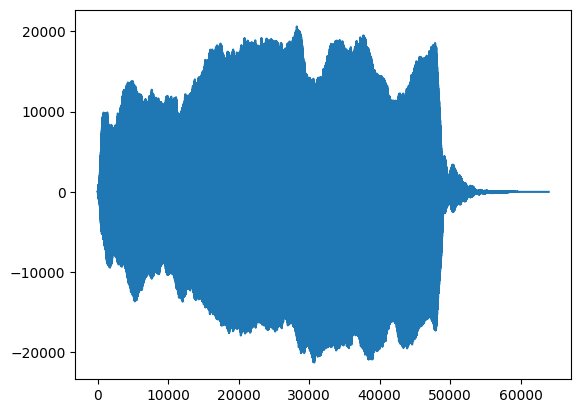

Spectrogram shape: (129, 285)
Frequency: (129,)
Time: (285,)


In [21]:
# Create the spectrogram
filename = 'flute_acoustic_002-080-127.wav'
waveform, sample_rate = f.read_wav_file_scipy(path + filename)

print('Waveform shape:', waveform.shape)
print('Sample rate:', sample_rate)

# Plot the waveform
plt.plot(waveform)
plt.show()

freq, ts, spectrogram = f.create_spectrogram(waveform, sample_rate = 1)

print('Spectrogram shape:', spectrogram.shape)
print('Frequency:', freq.shape)
print('Time:', ts.shape)

Waveform shape: (36352,)


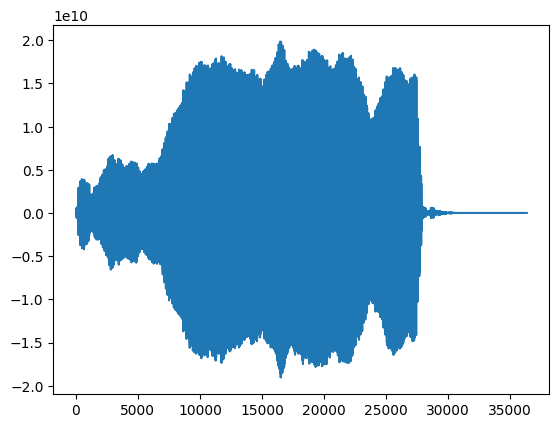

In [22]:
# Convert the spectrogram back to a waveform
times, waveform_reconstructed = f.invert_spectrogram(1, spectrogram)

print('Waveform shape:', waveform_reconstructed.shape)
# Plot the reconstructed waveform
plt.plot(waveform_reconstructed)
plt.show()


In [38]:
len_waveform = len(waveform)
len_waveform_reconstructed = len(waveform_reconstructed)

ratio = len_waveform_reconstructed / len_waveform
print('Ratio:', ratio)

_, waveform_reconstructed_2= sp.signal.istft(spectrogram, fs = 1000000)

# Create the .wav file from the reconstructed waveform
sp.io.wavfile.write('reconstructed.wav', 16000, waveform_reconstructed_2)

Ratio: 0.568


In [40]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import scipy.io.wavfile as wav

In [48]:
def audio_to_waveform(wav_file):
    # Load the .wav file
    waveform, sr = librosa.load(wav_file, sr=None)
    return waveform, sr

def waveform_to_spectrogram(waveform):
    # Create a Short-Time Fourier Transform (STFT)
    spectrogram = librosa.stft(waveform)

    return spectrogram

def reconstruct_wav_from_spectrogram(D, sr, output_wav_file_name):
    # Convert the STFT back to time domain
    y_reconstructed = librosa.istft(D)

    # Normalize the audio to the range -1 to 1
    y_reconstructed = y_reconstructed / np.max(np.abs(y_reconstructed))

    # Save the reconstructed audio as a .wav file
    wav.write(output_wav_file_name, sr, (y_reconstructed * 32767).astype(np.int16))

# Input and output file paths
input_wav_file_1 = 'flute_acoustic_002-080-127.wav'
input_wav_file_2 = 'guitar_acoustic_014-051-127.wav'
output_wav_file = 'reconstructed.wav'


# Create spectrogram and reconstruct the .wav file
waveform_flute, sr_flute = audio_to_waveform(path + input_wav_file_1)
waveform_guitar, sr_guitar = audio_to_waveform(path + input_wav_file_2)

# Add the waveforms together
waveform_combined = waveform_flute + waveform_guitar

# Create the spectrogram
spectrogram_combined = waveform_to_spectrogram(waveform_combined)

output_wav_file = 'reconstructed_combined.wav'
# Reconstruct the .wav file
reconstruct_wav_from_spectrogram(spectrogram_combined, sr_flute, output_wav_file)